## negative sentiment graph

In [1]:
# 1_network_df

import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import os
from glob import glob

pd.set_option('display.mpl_style', 'default') 
pd.set_option('display.width', 5000) 
pd.set_option('display.max_columns', 60)

gml_files = glob('../output/network/article_neg1.gml')

/home/gkang/anaconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2885: FutureWarning: 
mpl_style had been deprecated and will be removed in a future version.
Use `matplotlib.pyplot.style.use` instead.

  exec(code_obj, self.user_global_ns, self.user_ns)


In [2]:
def calculate_graph_inf(graph):
    graph.name = filename
    info = nx.info(graph)
    print info
    #plt.figure(figsize=(10,10))
    #nx.draw_spring(graph, arrows=True, with_labels=True)

def highest_centrality(cent_dict):
    """Returns a tuple (node,value) with the node
    with largest value from centrality dictionary."""
    # create ordered tuple of centrality data
    cent_items = [(b,a) for (a,b) in cent_dict.iteritems()]
    # sort in descending order
    cent_items.sort()
    cent_items.reverse()
    return tuple(reversed(cent_items[0]))

In [3]:
network_data_columns = ['name',
                    'sentiment',
                    '# nodes',
                    '# edges',
                    'avg deg',
                    'avg in-deg',
                    'avg out-deg',
                    'density',
                    'deg assort coef', 
                    'avg deg cent',
                    'avg bet cent',
                    'avg clo cent',
                    'high deg cent',
                    'high bet cent',
                    'high clo cent',
                    'avg node conn',
                    '# conn comp',
                    'gc size',
                    '# strong comp',
                    '# weak comp'
                    ]
network_data = pd.DataFrame(columns = network_data_columns)

In [4]:
# graph = directed, ugraph = undirected
for graph_num, gml_graph in enumerate(gml_files):
    graph = nx.read_gml(gml_graph)
    ugraph = graph.to_undirected() # to undirected graph
    U = graph.to_undirected(reciprocal=True)
    e = U.edges()
    ugraph.add_edges_from(e)
    (filepath, filename) = os.path.split(gml_graph)
    print('-' * 10)
    print(gml_graph)
    calculate_graph_inf(graph)
    calculate_graph_inf(ugraph)
    
    # calculate variables
    #sent = filepath.split('/')[-1]
    sent = "negative"
    nodes = nx.number_of_nodes(graph)
    edges = nx.number_of_edges(graph)
    density = float("{0:.4f}".format(nx.density(graph)))
    avg_deg_cen = np.array(nx.degree_centrality(graph).values()).mean()
    avg_bet_cen = np.array(nx.betweenness_centrality(graph).values()).mean()
    avg_clo_cen = np.array(nx.closeness_centrality(graph).values()).mean()
    in_deg = sum(graph.in_degree().values())/float(nx.number_of_nodes(graph))
    out_deg = sum(graph.out_degree().values())/float(nx.number_of_nodes(graph))    
    avg_deg = float("{0:.4f}".format(in_deg + out_deg))
    strong_comp = nx.number_strongly_connected_components(graph)
    weak_comp =  nx.number_weakly_connected_components(graph)
    avg_node_con = float("{0:.4f}".format((nx.average_node_connectivity(graph))))
    deg_assort_coeff = float("{0:.4f}".format((nx.degree_assortativity_coefficient(graph))))
    conn_comp = nx.number_connected_components(ugraph)
    deg_cen = nx.degree_centrality(graph)
    bet_cen = nx.betweenness_centrality(graph)
    clo_cen = nx.closeness_centrality(graph)
    highest_deg_cen = highest_centrality(deg_cen)
    highest_bet_cen = highest_centrality(bet_cen)
    highest_clo_cen = highest_centrality(clo_cen)
    Gc = len(max(nx.connected_component_subgraphs(ugraph), key=len))

    # save variables into list
    graph_values = {'name':filename,
                    'sentiment':sent,
                    '# nodes':nodes,
                    '# edges':edges,
                    'avg deg':avg_deg,
                    'avg in-deg':"%.4f" % in_deg,
                    'avg out-deg':"%.4f" % out_deg,
                    'density':density,
                    'deg assort coef':deg_assort_coeff,
                    'avg deg cent':"%.4f" % avg_deg_cen,
                    'avg bet cent':"%.4f" % avg_bet_cen,
                    'avg clo cent':"%.4f" % avg_clo_cen,
                    'high deg cent':highest_deg_cen,
                    'high bet cent':highest_bet_cen,
                    'high clo cent':highest_clo_cen,
                    'avg node conn':avg_node_con,
                    '# conn comp':conn_comp,
                    'gc size':Gc,
                    '# strong comp':strong_comp,
                    '# weak comp':weak_comp
                    }
    network_data = network_data.append(graph_values, ignore_index=True)

----------
../output/network/article_neg1.gml
Name: article_neg1.gml
Type: MultiDiGraph
Number of nodes: 1257
Number of edges: 1898
Average in degree:   1.5099
Average out degree:   1.5099
Name: article_neg1.gml
Type: MultiGraph
Number of nodes: 1257
Number of edges: 1898
Average degree:   3.0199


In [5]:
network_data

#network_data.to_csv('output/network_df_.csv', encoding = 'utf-8')

,name,sentiment,# nodes,# edges,avg deg,avg in-deg,avg out-deg,density,deg assort coef,avg deg cent,avg bet cent,avg clo cent,high deg cent,high bet cent,high clo cent,avg node conn,# conn comp,gc size,# strong comp,# weak comp
0,article_neg1.gml,negative,1257.0,1898.0,3.0199,1.5099,1.5099,0.0012,0.0012,0.0024,0.0005,0.0329,"(vaccines, 0.106687898089)","(vaccines, 0.0689197216817)","(vaccine industry, 0.158231271073)",0.1757,49.0,1140.0,1092.0,49.0


- - -

In [6]:
# 2_node_df
data_columns = ['name',
                'sentiment'
                ]
data = pd.DataFrame(columns = data_columns)
combined_df = pd.DataFrame()

In [7]:
# graph = directed, ugraph = undirected
for graph_num, gml_graph in enumerate(gml_files):
    print('-' * 10)
    print(gml_graph)
    calculate_graph_inf(graph)
    calculate_graph_inf(ugraph)

    # calculate variables and save into list
    #sent = filepath.split('/')[-1]
    deg_cent = nx.degree_centrality(graph)
    bet_cent = nx.betweenness_centrality(graph)
    clo_cent = nx.closeness_centrality(graph)
    graph_values = {'name':filename,
                    'sentiment':sent
                    }
    data = data.append(graph_values, ignore_index=True)

    degree = nx.degree(graph)
    deg_df = pd.DataFrame.from_dict(degree, orient = 'index')
    deg_df.columns = ['degree']
    # degree centrality
    deg_cent = nx.degree_centrality(graph)
    dc_df = pd.DataFrame.from_dict(deg_cent, orient = 'index')
    dc_df.columns = ['deg cent']
    # betweenness centrality
    bet_cent = nx.betweenness_centrality(graph)
    bc_df = pd.DataFrame.from_dict(bet_cent, orient = 'index')
    bc_df.columns = ['bet cent']
    # closeness centrality
    clo_cent = nx.closeness_centrality(graph)
    cc_df = pd.DataFrame.from_dict(clo_cent, orient = 'index')
    cc_df.columns = ['clo cent']
    # concat node frames into node_df
    frames = [deg_df, dc_df, bc_df, cc_df]
    node_df = pd.concat(frames, axis = 1)
    node_df.index.name = 'node'
    node_df = node_df.reset_index()

    values = pd.DataFrame(graph_values, columns = ('name', 'sentiment'), index = [0])
    
    # df = merges graph_values with node_df for single graph and fill NaNs
    df = pd.concat([values, node_df], axis = 1)
    df = df.fillna(method='ffill')
    combined_df = combined_df.append(df)

----------
../output/network/article_neg1.gml
Name: article_neg1.gml
Type: MultiDiGraph
Number of nodes: 1257
Number of edges: 1898
Average in degree:   1.5099
Average out degree:   1.5099
Name: article_neg1.gml
Type: MultiGraph
Number of nodes: 1257
Number of edges: 1898
Average degree:   3.0199


In [8]:
combined_df

#combined_df.to_csv('.csv', encoding = 'utf-8')

,name,sentiment,node,degree,deg cent,bet cent,clo cent
0,article_neg1.gml,negative,ACIP,1,0.000796,0.000000e+00,0.077104
1,article_neg1.gml,negative,ACIP's rotavirus use recommendation,1,0.000796,0.000000e+00,0.000000
2,article_neg1.gml,negative,ADHD,1,0.000796,0.000000e+00,0.102970
3,article_neg1.gml,negative,AIDS,1,0.000796,0.000000e+00,0.000000
4,article_neg1.gml,negative,African American males,2,0.001592,0.000000e+00,0.105347
5,article_neg1.gml,negative,African women,3,0.002389,2.008949e-06,0.000796
6,article_neg1.gml,negative,African-American children,1,0.000796,0.000000e+00,0.000000
7,article_neg1.gml,negative,Alysia Osoff,6,0.004777,4.250514e-04,0.097385
8,article_neg1.gml,negative,America,2,0.001592,1.903215e-06,0.001433
9,article_neg1.gml,negative,American Academy of Pediatrics,2,0.001592,2.170723e-04,0.095888


- - -

In [9]:
# 7_negative_graph_calculation
def drawIt(graph, what = 'graph'):
    nsize = graph.number_of_nodes()
    print "Drawing %s of size %s:" % (what, nsize)
    
    if nsize > 20:
        plt.figure(figsize=(10, 10))
        if nsize > 40:
            nx.draw_spring(graph, with_labels = True, node_size = 70, font_size = 12)
        else:
            nx.draw_spring(graph, with_labels = True)
    else:
        nx.draw_spring(graph, with_labels = True)
    plt.show()

def describeGraph(graph):
    components = sorted(nx.connected_components(graph), key = len, reverse = True)
    cc = [len(c) for c in components]
    subgraphs = list(nx.connected_component_subgraphs(graph))
    params = (graph.number_of_edges(),graph.number_of_nodes(),len(cc))
    print "Graph has %s nodes, %s edges, %s connected components\n" % params
    drawIt(graph)
    for sub in components:
        drawIt(graph.subgraph(sub), what = 'component')

In [10]:
# list of connected components by size
connected_components = [len(c) for c in sorted(nx.connected_components(ugraph), key=len, reverse=True)]

# generate connected components as subgraphs
subgraphs = list(nx.connected_component_subgraphs(ugraph))

# greatest component
Gc = max(nx.connected_component_subgraphs(ugraph), key=len)

# returns all minimum k cutsets of an undirected graph
# i.e., the set(s) of nodes of cardinality equal to the node connectivity of G
# thus if removed, would break G into two or more connected components
cutsets = list(nx.all_node_cuts(Gc))

print "Connected components =", connected_components
print "Greatest component size =", len(Gc)
print "# of cutsets =", len(cutsets)

# returns a set of nodes or edges of minimum cardinality that disconnects G
print "Min node cut =", nx.minimum_node_cut(Gc)
print "Min edge cut =", nx.minimum_edge_cut(Gc)

Connected components = [1140, 7, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
Greatest component size = 1140
# of cutsets = 226
Min node cut = set([u'United States'])
Min edge cut = set([(u'influenza', u'childhood diseases')])


In [11]:
# min cuts with source and target
print nx.minimum_node_cut(Gc, s='vaccines', t='autism')
print nx.minimum_edge_cut(Gc, s='vaccines', t='autism')

set([u'mercury', u'toxic chemical ingredients', u'vaccine safety', u"alzheimer's", u'measles', u'CDC whistleblower', u'CDC', u'vaccine-injured children', u'thimerosal', u'vaccination', u'public', u'rates', u'encephalopathy', u'Vaccine Injury Compensation Program', u'MMR', u'studies', u'children', u'hepatitis B vaccine'])
set([(u'hepatitis B vaccine', u'autism'), (u'thimerosal', u'autism'), (u'public', u'autism'), (u'toxic chemical ingredients', u'autism'), (u'vaccine-injured children', u'autism'), (u'rates', u'autism'), (u'MMR', u'autism'), (u'CDC whistleblower', u'autism'), (u'vaccine safety', u'autism'), (u'Vaccine Injury Compensation Program', u'autism'), (u'newborn boys', u'autism'), (u'encephalopathy', u'autism'), (u'vaccines', u'autism'), (u'preservative', u'autism'), (u'link', u'autism'), (u'measles', u'autism'), (u"alzheimer's", u'autism'), (u'glutathione', u'autism'), (u'African American males', u'autism'), (u'children', u'autism'), (u'Ryan Mojabi', u'autism'), (u'studies', u'

In [12]:
# read edge labels in min cut for Gc
# change source and target
a = nx.minimum_edge_cut(Gc, s='vaccines', t='autism')
#a = nx.minimum_edge_cut(Gc)

labels = nx.get_edge_attributes(Gc,'edge')
edgelabels = {}
for e in labels.keys():
    e1 = e[0:2]
    edgelabels[e1]=labels[e]

for e in a:
    if edgelabels.has_key(e):
        print e,edgelabels[e]
    else:
        rev_e = e[::-1]
        print rev_e, edgelabels[rev_e]

(u'hepatitis B vaccine', u'autism') giving to newborn baby boys more than triples their risk of developing
(u'thimerosal', u'autism') was directly caused by
(u'public', u'autism') wonders why they have
(u'toxic chemical ingredients', u'autism') may be significant contributing factor to
(u'autism', u'vaccine-injured children') often revealed to have
(u'rates', u'autism') in U.K is 1 in 83
(u'MMR', u'autism') only one studied in association with
(u'CDC whistleblower', u'autism') admitting vaccines are linked to
(u'vaccine safety', u'autism') questionable in relation to
(u'Vaccine Injury Compensation Program', u'autism') found in two kids after being vaccinated awarded by
(u'newborn boys', u'autism') more than tripled their risk of developing
(u'encephalopathy', u'autism') caused by vaccines produces a permanent injury and creates symptoms of
(u'vaccines', u'autism') debate rages on
(u'preservative', u'autism') in vaccine causes
(u'autism', u'link') existing between vaccines and
(u'autism

In [ ]:
# this takes forever
# average connectivity k of a graph G is the average of local node connectivity over all pairs of nodes of G
#nx.average_node_connectivity(Gc)

- - -

In [13]:
# 8_single_calc_neg
#describeGraph(ugraph)

In [14]:
# degree histogram: returns a list of frequencies of degrees
print "Degree histogram:", nx.degree_histogram(ugraph)

Degree histogram: [0, 692, 265, 86, 54, 34, 23, 18, 11, 7, 8, 8, 5, 6, 2, 0, 5, 4, 2, 2, 3, 3, 3, 2, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]


Degree sequence [134, 76, 72, 65, 62, 47, 41, 41, 40, 33, 31, 29, 27, 26, 23, 23, 22, 22, 22, 21, 21, 21, 20, 20, 20, 19, 19, 18, 18, 17, 17, 17, 17, 16, 16, 16, 16, 16, 14, 14, 13, 13, 13, 13, 13, 13, 12, 12, 12, 12, 12, 11, 11, 11, 11, 11, 11, 11, 11, 10, 10, 10, 10, 10, 10, 10, 10, 9, 9, 9, 9, 9, 9, 9, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 

/home/gkang/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family [u'monospace'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


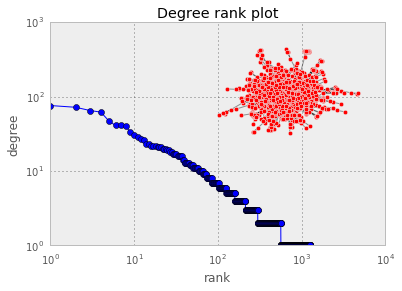

In [15]:
# degree rank plot (undirected)
degree_sequence = sorted(nx.degree(ugraph).values(),reverse=True) # degree sequence
print "Degree sequence", degree_sequence
dmax = max(degree_sequence)

plt.loglog(degree_sequence,'b-', marker = 'o')
plt.title("Degree rank plot")
plt.ylabel("degree")
plt.xlabel("rank")

# draw graph in inset
plt.axes([0.45,0.45,0.45,0.45])
Gcc = sorted(nx.connected_component_subgraphs(ugraph), key = len, reverse = True)[0]
pos = nx.spring_layout(Gcc)
plt.axis('off')
nx.draw_networkx_nodes(Gcc, pos, node_size = 20)
nx.draw_networkx_edges(Gcc, pos, alpha = 0.4)

plt.show()

In [16]:
# degree centrality
dc = nx.degree_centrality(graph)
dc_df = pd.DataFrame.from_dict(dc, orient = 'index')
dc_df.columns = ['degree cent']
dc_df = dc_df.sort_values(by = ['degree cent'])
#dc_df

# betweenness centrality
bc = nx.betweenness_centrality(graph)
bc_df = pd.DataFrame.from_dict(bc, orient = 'index')
bc_df.columns = ['betweenness cent']
bc_df = bc_df.sort_values(by = ['betweenness cent'])
#bc_df

# closeness centrality
cc = nx.closeness_centrality(graph)
cc_df = pd.DataFrame.from_dict(cc, orient = 'index')
cc_df.columns = ['closeness cent']
cc_df = cc_df.sort_values(by = ['closeness cent'])
#cc_df

In [17]:
# SUMMARY

#network_data
#combined_df
#dc_df, bc_df, cc_df
print "Degree histogram:", nx.degree_histogram(graph)
print "Connected components =", connected_components
print "Greatest component size =", len(Gc)
#describeGraph(ugraph)
print "# of cutsets =", len(cutsets)
print "Min node cut =", nx.minimum_node_cut(Gc)
print "Min edge cut =", nx.minimum_edge_cut(Gc)

Degree histogram: [0, 692, 265, 86, 54, 34, 23, 18, 11, 7, 8, 8, 5, 6, 2, 0, 5, 4, 2, 2, 3, 3, 3, 2, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
Connected components = [1140, 7, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
Greatest component size = 1140
# of cutsets = 226
Min node cut = set([u'United States'])
Min edge cut = set([(u'influenza', u'childhood diseases')])
